In [16]:
import datetime as dt
import numpy as np
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import math

In [9]:
with open('./csvs/reddit-jetblue-sentiment.json', 'r') as fp:
    topics_dict = json.load(fp)

### Overall NLP Graphs

ent_score Mean: -0.14848485117721738 St Dev: 2.063517341090968


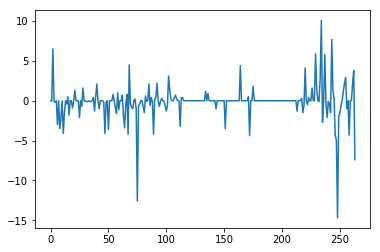

ent_magn Mean: 2.1424242569077196 St Dev: 4.373363284426101


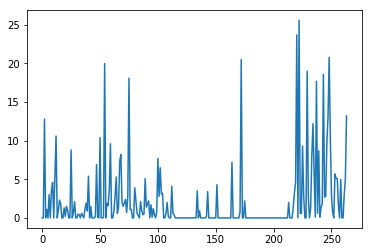

overall_score Mean: -0.012121212217166569 St Dev: 0.15177251154953056


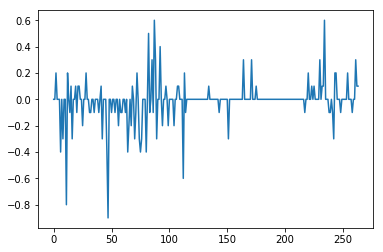

overall_magn Mean: 1.1700757539012667 St Dev: 2.287493652680755


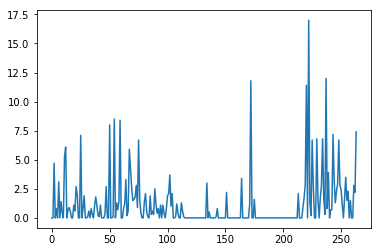

In [23]:
ent_score = np.asarray(topics_dict["ent_score"])
print("ent_score","Mean:",np.mean(ent_score),"St Dev:",np.std(ent_score))
plt.plot(ent_score)
plt.show()

ent_magn = np.asarray(topics_dict["ent_magn"])
print("ent_magn","Mean:",np.mean(ent_magn),"St Dev:",np.std(ent_magn))
plt.plot(ent_magn)
plt.show()

overall_score = np.asarray(topics_dict["overall_score"])
print("overall_score","Mean:",np.mean(overall_score),"St Dev:",np.std(overall_score))
plt.plot(overall_score)
plt.show()

overall_magn = np.asarray(topics_dict["overall_magn"])
print("overall_magn","Mean:",np.mean(overall_magn),"St Dev:",np.std(overall_magn))
plt.plot(overall_magn)
plt.show()

Ent score vs. magn


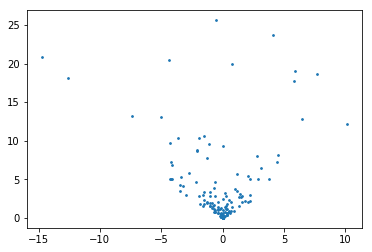

Overall score vs. magn


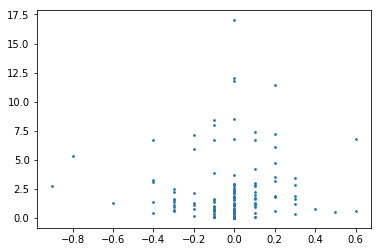

In [15]:
print("Ent score vs. magn")
plt.scatter(ent_score, ent_magn, s=3)
plt.show()

print("Overall score vs. magn")
plt.scatter(overall_score, overall_magn, s=3)
plt.show()

### Score Correlation

In [29]:
ent_score = topics_dict["ent_score"]
ent_magn = topics_dict["ent_magn"]
title = topics_dict["title"]
body = topics_dict["body"]
for i, scr in enumerate(ent_score):
    if scr < 0:
        print("Title:",title[i],"Ent Score", ent_score[i], "Ent Magn", ent_score[i], "\n Body:",body[i],'\n\n\n')

Title: Jetblue in BOS went the extra mile Saturday. Ent Score -0.20000001043081284 Ent Magn -0.20000001043081284 
 Body: They took extraodinary measures to make sure a wounded warrior made his connection. Well done. 



Title: Why does the JB website suck? Ent Score -2.9999999701976776 Ent Magn -2.9999999701976776 
 Body: You can't sign in on Chrome.  There's a separate website for travel than for the main website.  It says you're logged in and then when you try to access My Trips, then it says there's an error.  If you try to use Travel Bank and have Even More Space seats, the transactions crashes.  The travel is great, but the website is atrocious!  Like it was made by 6th graders for a school project. 



Title: Jetblue.com, website issues? Ent Score -3.5000000819563866 Ent Magn -3.5000000819563866 
 Body: https://trueblue.jetblue.com/login?redirectUrl=%2Fedit-profile

When trying to edit my profile the icon just spins and I see the following pop-up notification on the bottom of my 

In [127]:
ent_score = topics_dict["ent_score"]
ent_magn = topics_dict["ent_magn"]
title = topics_dict["title"]
body = topics_dict["body"]

ct = 0
total = 0
posts = []
for i, scr in enumerate(ent_score):
    if scr is not 0:
        total += 1
    if scr > 0:
        ct += 1
        # keywords = ["food", "voucher"] # food
        keywords = ["recruit", "academy", "cadet", "job", "intern"] # jobs
        # keywords = ["dog ", "cat ", "pet "] # pet
        # keywords = ["luggage", "baggage", "lost", "delay", "late"] # delay
        # keywords = ["rude", "mean", "yell"] # quality of care
        # keywords = ["wifi", "outlet", "connectivity"]
        # keywords = ["website", "mobile"]
        for keyword in keywords:
            if keyword in body[i]:
                posts.append(i)
                break
print("Num posts", len(posts), ", Same Sentiment", ct, ", Percentage", (len(posts)/total*100), ", Total", total)

Num posts 10 , Same Sentiment 52 , Percentage 7.575757575757576 , Total 132


In [128]:
for i in posts:
    print("Title:",title[i],"Ent Score", ent_score[i], "Ent Magn", ent_score[i], "\n Body:",body[i],'\n\n\n')

Title: Internship Ent Score 0.5 Ent Magn 0.5 
 Body: Hello guys,

Not sure if anyone here can help me or even point me in the right direction, but you have to start somewhere. I am a Sophomore at FSU studying meteorology, I am putting together a list of internships I would like to apply to for Summer 2020 (I know it's a little early and many companies have not posted openings). I was wondering if JetBlue had any type of Summer internship in meteorology available as other airlines like Southwest and Delta do. Thank you in advance. 



Title: Jobs at PWM. Ent Score 0.4000000059604645 Ent Magn 0.4000000059604645 
 Body: Does anyone know what, if any, full time, non-contract jobs JetBlue has at Portland international jet port--Portland, ME? 



Title: Flair update: Instrument Rating! Ent Score 4.100000023841858 Ent Magn 4.100000023841858 
 Body: Passed my instrument checkride today with DPE Fred Reeb. Super cool guy. He's a Jetblue captain and former FAA inspector, so I felt a little bit m

Total 132
[3, 0, 9, 0, 3, 3, 6, 6, 6, 6, 3, 7]


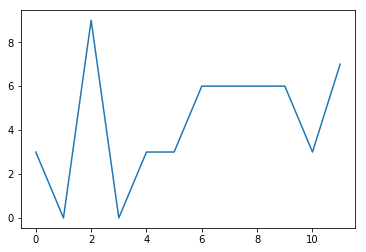

In [124]:
ent_score = topics_dict["ent_score"]
ent_magn = topics_dict["ent_magn"]
title = topics_dict["title"]
body = topics_dict["body"]
created = topics_dict["created"]

ct = 0
total = 0
months = [0 for x in range(12)]
for i, scr in enumerate(ent_score):
    if scr is not 0:
        total += 1
    if scr > 0:
        ct += 1
        months[dt.datetime.fromtimestamp(created[i]).month-1] += 1
print("Total", total)
print(months)
plt.plot(months)
plt.show()